In [1]:
from animate import anim 
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd
from utils import charge_data



In [2]:
X_train, U_train, X_full, U_full, mean_std = charge_data()

In [3]:
x_full = X_full[:,0]*mean_std['x_std'] + mean_std['x_mean']
y_full = X_full[:,1]*mean_std['y_std'] + mean_std['y_mean']
t_full = X_full[:,2]*mean_std['t_std'] + mean_std['t_mean']
u_full = U_full[:,0]*mean_std['u_std'] + mean_std['u_mean']
v_full = U_full[:,1]*mean_std['v_std'] + mean_std['v_mean']





In [4]:
v = np.sqrt(u_full**2+v_full**2)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0


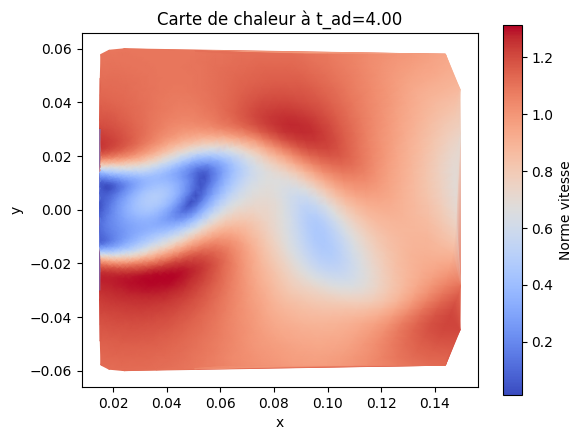

In [5]:
anim('data.gif', x_full, y_full, t_full, v, fps=5)

In [4]:
X_pred = torch.tensor(X_full, dtype=torch.float32)

In [5]:
U_pred = model(X_pred)

In [6]:
x_norm_pred, y_norm_pred, t_norm_pred = X_pred.detach().numpy()[:,0], X_pred.detach().numpy()[:,1], X_pred.detach().numpy()[:,2]
u_norm_pred, v_norm_pred, p_norm_pred = U_pred.detach().numpy()[:,0], U_pred.detach().numpy()[:,1], U_pred.detach().numpy()[:,2]

In [7]:
x_pred = x_norm_pred*x_full.std() + x_full.mean()
y_pred = y_norm_pred*y_full.std() + y_full.mean()
t_pred = t_norm_pred*t_full.std() + t_full.mean()
u_pred = u_norm_pred*u_full.std() + u_full.mean()
v_pred = v_norm_pred*v_full.std() + v_full.mean()
p_pred = p_norm_pred*p_full.std() + p_full.mean()

In [8]:
norme_vitesse = np.sqrt(u_pred**2 + v_pred**2)

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.animation import FuncAnimation


# # Pour plot

# def plot_flow(x,y,t,norme_vitesse,frame) :   
#     plt.clf()
#     time = list(set(t))
#     time.sort()
#     indices = np.where(t == time[frame])
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.tripcolor(x[indices], y[indices], norme_vitesse[indices], shading='gouraud', cmap='coolwarm', vmin=0, vmax=1.3)
#     plt.colorbar(label='Norme vitesse')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title(f'Carte de chaleur à t_ad={time[frame]:.2f}')
    
# def anim(name_file, x, y, t, norme_vitesse):
#     fig = plt.figure()
#     def animate(frame):
#         plot_flow(x,y,t,norme_vitesse, frame)
#         print(frame)
#         return fig,
#     ani = FuncAnimation(fig, animate, frames=np.arange(0, len(set(t))))#, repeat=False)
#     ani.save(name_file, writer='pillow', fps=7)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0


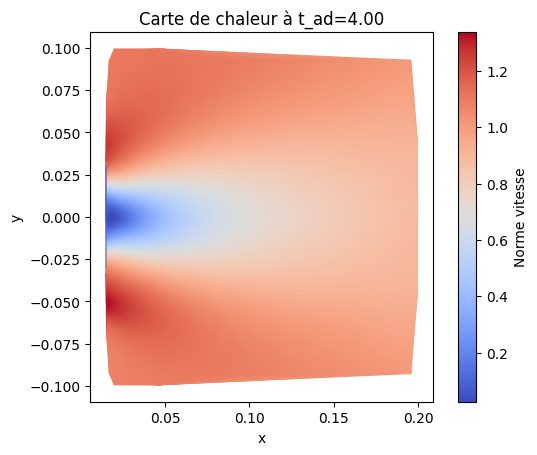

In [10]:
with torch.no_grad():
    anim('supervised.gif', x_pred, y_pred, t_pred, norme_vitesse)